# Homework week 3

## Preparation

Install packages

In [1]:
#import packages
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from math import sqrt


Download data

In [2]:
#download data
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'
!wget $data -O data.csv

--2023-10-01 14:50:45--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  8.04MB/s    in 0.2s    

2023-10-01 14:50:46 (8.04 MB/s) - ‘data.csv’ saved [1475504/1475504]



Select only the desired columns and clean columns names and string contents

In [3]:
#load data into dataframe
df = pd.read_csv('data.csv')
df.head().T

,0,1,2,3,4
Make,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011
Engine Fuel Type,premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required)
Engine HP,335.0,300.0,300.0,230.0,230.0
Engine Cylinders,6.0,6.0,6.0,6.0,6.0
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive
Number of Doors,2.0,2.0,2.0,2.0,2.0
Market Category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance","Luxury,High-Performance","Luxury,Performance",Luxury


In [4]:
#get desired columns from homework and overwrite df
desired_columns = ['Make','Model','Year','Engine HP','Engine Cylinders','Transmission Type','Vehicle Style','highway MPG','city mpg','MSRP']
df = df[desired_columns]
#clean df columns
df.columns = df.columns.str.lower().str.replace(' ','_') 
#clean df categorical values
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')

#check work
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500


Rename msrp to price, fill in missing values with 0

In [5]:
#rename msrp to price
df = df.rename(columns={'msrp': 'price'})

In [6]:
#find missing values
#df.isnull().sum()
#replace missing values with 0
columns_to_fill = ['engine_hp', 'engine_cylinders']
df[columns_to_fill] = df[columns_to_fill].fillna(0)
df.isnull().sum()


make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
dtype: int64

In [7]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500


## Question 1
What is the most frequent observation (mode) for the column 'transmission_type'?

In [8]:
df['transmission_type'].mode()
#checking
#df['transmission_type'].value_counts()

0    automatic
Name: transmission_type, dtype: object

## Question 2
Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

In [9]:
#determine which columns are numerical
df.dtypes
numerical = ['year','engine_hp','engine_cylinders','highway_mpg','city_mpg','age']

In [10]:
#turn year into a true numerical
df['year'].max()
#max is 2017

#create column age based on max year
def convert_to_age(year):
    return 2017 - year
df['age'] = df['year'].apply(convert_to_age)
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,age
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135,6
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650,6
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350,6
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450,6
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500,6


In [11]:
#create correlation matrix with numerical values
correlation_matrix = df[numerical].corr()
print(correlation_matrix)

                      year  engine_hp  engine_cylinders  highway_mpg  \
year              1.000000   0.338714         -0.040708     0.258240   
engine_hp         0.338714   1.000000          0.774851    -0.415707   
engine_cylinders -0.040708   0.774851          1.000000    -0.614541   
highway_mpg       0.258240  -0.415707         -0.614541     1.000000   
city_mpg          0.198171  -0.424918         -0.587306     0.886829   
age              -1.000000  -0.338714          0.040708    -0.258240   

                  city_mpg       age  
year              0.198171 -1.000000  
engine_hp        -0.424918 -0.338714  
engine_cylinders -0.587306  0.040708  
highway_mpg       0.886829 -0.258240  
city_mpg          1.000000 -0.198171  
age              -0.198171  1.000000  


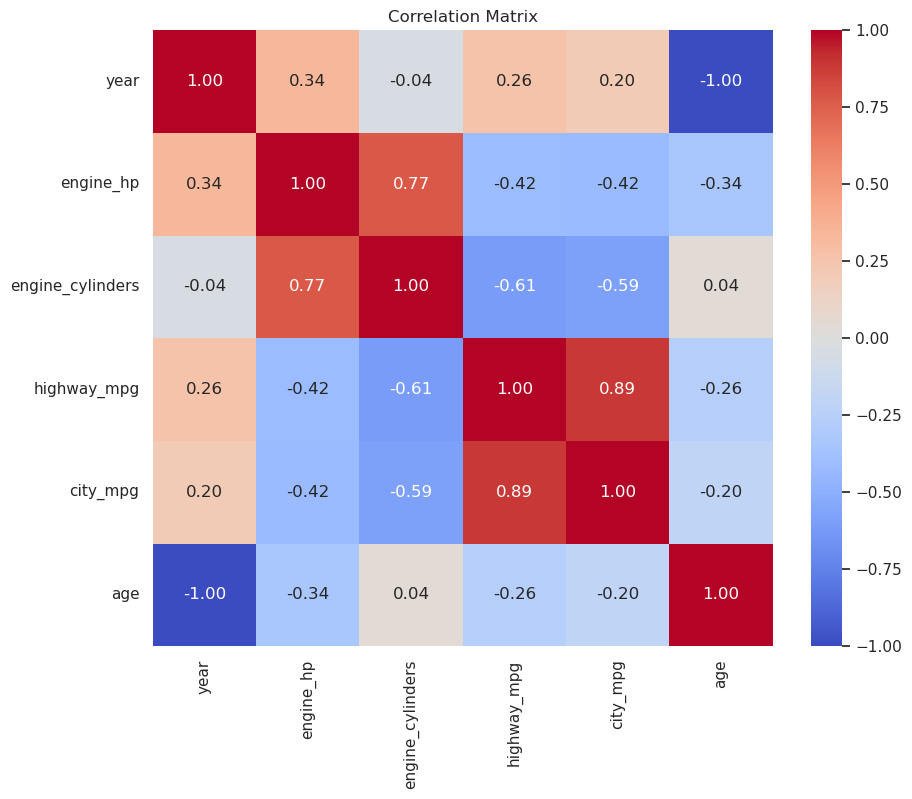

In [12]:
#visualize it
sns.set(style="white")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## Further preparation

Make price binary using the average price as variable `above_average` which is 1 if the price is above the mean and 0 otherwise

In [13]:
#set average
above_average = df['price'].mean()
#turn price into binary using in-line function
df['above_average'] = df['price'].apply(lambda x: 1 if x > above_average else 0)
df['above_average']

0        1
1        1
2        0
3        0
4        0
        ..
11909    1
11910    1
11911    1
11912    1
11913    0
Name: above_average, Length: 11914, dtype: int64

Split the data into train/val/test with 60%/20%/20% distribution using scikit-learn and seed 42  
Must ensure above_average is not in the datasets

In [14]:
df.head().T

,0,1,2,3,4
make,bmw,bmw,bmw,bmw,bmw
model,1_series_m,1_series,1_series,1_series,1_series
year,2011,2011,2011,2011,2011
engine_hp,335.0,300.0,300.0,230.0,230.0
engine_cylinders,6.0,6.0,6.0,6.0,6.0
transmission_type,manual,manual,manual,manual,manual
vehicle_style,coupe,convertible,coupe,coupe,convertible
highway_mpg,26,28,28,28,28
city_mpg,19,19,20,18,18
price,46135,40650,36350,29450,34500


In [15]:
#split the dataset into train and test
#random_state (seed) = 42 as instructed
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state=42)

In [16]:
#split the dataset into train and validation
#mathematically we need 25% of the df_full_train to equal 20% of df
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=1)

In [17]:
#ensure lengths match up
len(df_train), len(df_test), len(df_val)

(7148, 2383, 2383)

In [18]:
#reset index, not necessary but looks better
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [19]:
#split out target (y) values
y_train = df_train.above_average.values
y_test = df_test.above_average.values
y_val = df_val.above_average.values

In [20]:
#remove target (y) values from dataframes
del df_train['above_average']
del df_test['above_average']
del df_val['above_average']

## Question 3
- Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.
- Round the scores to 2 decimals using round(score, 2).

Which of these variables has the lowest mutual information score?

In [21]:
#set categorical columns to variable
df.dtypes
categorical = ['make', 'model', 'transmission_type', 'vehicle_style']

In [22]:
def mutual_info_churn_score(series):
    return mutual_info_score(df_full_train.above_average, series)

In [23]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False).round(2)

model                0.46
make                 0.24
vehicle_style        0.08
transmission_type    0.02
dtype: float64

## Question 4
- Now let's train a logistic regression.
- Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
- Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)`
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [24]:
# get model with all the features and train on full train data
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [25]:
#create dict vectorizer, trasnform X, get y
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
y_full_train = df_full_train.above_average.values

In [26]:
#train model
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_full_train, y_full_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [27]:
#now for test dataset
dicts_test = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [28]:
y_pred = model.predict_proba(X_test)[:, 1]

In [29]:
#decide on threshold
churn_decision = (y_pred >= 0.5)

In [30]:
#check accuracy
accuracy = (churn_decision == y_test).mean()

Question 5
- Let's find the least useful feature using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

- year
- engine_hp
- transmission_type
- city_mpg

In [31]:
categorical = ['make', 'model', 'transmission_type', 'vehicle_style']
numerical = ['year','engine_hp','engine_cylinders','highway_mpg','city_mpg','age']

In [32]:
'''
#exclude year
categorical = ['make', 'model', 'transmission_type', 'vehicle_style']
numerical = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','age']

# get model with all the features and train on full train data
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

#create dict vectorizer, trasnform X, get y
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
y_full_train = df_full_train.above_average.values

#train model
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_full_train, y_full_train)

#now for test dataset
dicts_test = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)

y_pred = model.predict_proba(X_test)[:, 1]

#decide on threshold
churn_decision = (y_pred >= 0.5)

#check accuracy
accuracy_exclude_year = (churn_decision == y_test).mean()
'''

"\n#exclude year\ncategorical = ['make', 'model', 'transmission_type', 'vehicle_style']\nnumerical = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','age']\n\n# get model with all the features and train on full train data\ndicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')\n\n#create dict vectorizer, trasnform X, get y\ndv = DictVectorizer(sparse=False)\nX_full_train = dv.fit_transform(dicts_full_train)\ny_full_train = df_full_train.above_average.values\n\n#train model\nmodel = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)\nmodel.fit(X_full_train, y_full_train)\n\n#now for test dataset\ndicts_test = df_test[categorical + numerical].to_dict(orient='records')\nX_test = dv.transform(dicts_test)\n\ny_pred = model.predict_proba(X_test)[:, 1]\n\n#decide on threshold\nchurn_decision = (y_pred >= 0.5)\n\n#check accuracy\naccuracy_exclude_year = (churn_decision == y_test).mean()\n"

In [33]:
'''
#exclude engine_hp
categorical = ['make', 'model', 'transmission_type', 'vehicle_style']
numerical = ['year','engine_cylinders','highway_mpg','city_mpg','age']

# get model with all the features and train on full train data
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

#create dict vectorizer, trasnform X, get y
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
y_full_train = df_full_train.above_average.values

#train model
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_full_train, y_full_train)

#now for test dataset
dicts_test = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)

y_pred = model.predict_proba(X_test)[:, 1]

#decide on threshold
churn_decision = (y_pred >= 0.5)

#check accuracy
accuracy_exclude_engine_hp = (churn_decision == y_test).mean()
'''

"\n#exclude engine_hp\ncategorical = ['make', 'model', 'transmission_type', 'vehicle_style']\nnumerical = ['year','engine_cylinders','highway_mpg','city_mpg','age']\n\n# get model with all the features and train on full train data\ndicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')\n\n#create dict vectorizer, trasnform X, get y\ndv = DictVectorizer(sparse=False)\nX_full_train = dv.fit_transform(dicts_full_train)\ny_full_train = df_full_train.above_average.values\n\n#train model\nmodel = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)\nmodel.fit(X_full_train, y_full_train)\n\n#now for test dataset\ndicts_test = df_test[categorical + numerical].to_dict(orient='records')\nX_test = dv.transform(dicts_test)\n\ny_pred = model.predict_proba(X_test)[:, 1]\n\n#decide on threshold\nchurn_decision = (y_pred >= 0.5)\n\n#check accuracy\naccuracy_exclude_engine_hp = (churn_decision == y_test).mean()\n"

In [34]:
'''
#exclude transmission_type
categorical = ['make', 'model', 'vehicle_style']
numerical = ['engine_hp', 'year','engine_cylinders','highway_mpg','city_mpg','age']

# get model with all the features and train on full train data
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

#create dict vectorizer, trasnform X, get y
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
y_full_train = df_full_train.above_average.values

#train model
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_full_train, y_full_train)

#now for test dataset
dicts_test = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)

y_pred = model.predict_proba(X_test)[:, 1]

#decide on threshold
churn_decision = (y_pred >= 0.5)

#check accuracy
accuracy_exclude_transmission_type = (churn_decision == y_test).mean()
'''

"\n#exclude transmission_type\ncategorical = ['make', 'model', 'vehicle_style']\nnumerical = ['engine_hp', 'year','engine_cylinders','highway_mpg','city_mpg','age']\n\n# get model with all the features and train on full train data\ndicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')\n\n#create dict vectorizer, trasnform X, get y\ndv = DictVectorizer(sparse=False)\nX_full_train = dv.fit_transform(dicts_full_train)\ny_full_train = df_full_train.above_average.values\n\n#train model\nmodel = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)\nmodel.fit(X_full_train, y_full_train)\n\n#now for test dataset\ndicts_test = df_test[categorical + numerical].to_dict(orient='records')\nX_test = dv.transform(dicts_test)\n\ny_pred = model.predict_proba(X_test)[:, 1]\n\n#decide on threshold\nchurn_decision = (y_pred >= 0.5)\n\n#check accuracy\naccuracy_exclude_transmission_type = (churn_decision == y_test).mean()\n"

In [35]:
'''
#exclude city mpg
categorical = ['make', 'model', 'vehicle_style', 'transmission_type']
numerical = ['engine_hp', 'year','engine_cylinders','highway_mpg', 'age']

# get model with all the features and train on full train data
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

#create dict vectorizer, trasnform X, get y
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
y_full_train = df_full_train.above_average.values

#train model
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_full_train, y_full_train)

#now for test dataset
dicts_test = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)

y_pred = model.predict_proba(X_test)[:, 1]

#decide on threshold
churn_decision = (y_pred >= 0.5)

#check accuracy
accuracy_exclude_city_mpg = (churn_decision == y_test).mean()
'''

"\n#exclude city mpg\ncategorical = ['make', 'model', 'vehicle_style', 'transmission_type']\nnumerical = ['engine_hp', 'year','engine_cylinders','highway_mpg', 'age']\n\n# get model with all the features and train on full train data\ndicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')\n\n#create dict vectorizer, trasnform X, get y\ndv = DictVectorizer(sparse=False)\nX_full_train = dv.fit_transform(dicts_full_train)\ny_full_train = df_full_train.above_average.values\n\n#train model\nmodel = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)\nmodel.fit(X_full_train, y_full_train)\n\n#now for test dataset\ndicts_test = df_test[categorical + numerical].to_dict(orient='records')\nX_test = dv.transform(dicts_test)\n\ny_pred = model.predict_proba(X_test)[:, 1]\n\n#decide on threshold\nchurn_decision = (y_pred >= 0.5)\n\n#check accuracy\naccuracy_exclude_city_mpg = (churn_decision == y_test).mean()\n"

In [36]:
'''
exclude_year = accuracy - accuracy_exclude_year
exclude_engine_hp = accuracy - accuracy_exclude_engine_hp
exclude_transmission_type = accuracy - accuracy_exclude_transmission_type
exclude_city_mpg = accuracy - accuracy_exclude_city_mpg

exclude_year, exclude_engine_hp, exclude_transmission_type, exclude_city_mpg
'''

'\nexclude_year = accuracy - accuracy_exclude_year\nexclude_engine_hp = accuracy - accuracy_exclude_engine_hp\nexclude_transmission_type = accuracy - accuracy_exclude_transmission_type\nexclude_city_mpg = accuracy - accuracy_exclude_city_mpg\n\nexclude_year, exclude_engine_hp, exclude_transmission_type, exclude_city_mpg\n'

## Question 6
- For this question, we'll see how to use a linear regression model from Scikit-Learn.
- We'll need to use the original column price. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.
- This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].
- Round your RMSE scores to 3 decimal digits.

Which of these alphas leads to the best RMSE on the validation set?

In [40]:
#load data into dataframe
df = pd.read_csv('data.csv')

#get desired columns from homework and overwrite df
desired_columns = ['Make','Model','Year','Engine HP','Engine Cylinders','Transmission Type','Vehicle Style','highway MPG','city mpg','MSRP']
df = df[desired_columns]
#clean df columns
df.columns = df.columns.str.lower().str.replace(' ','_') 
#clean df categorical values
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')
	
#find missing values
#df.isnull().sum()
#replace missing values with 0
columns_to_fill = ['engine_hp', 'engine_cylinders']
df[columns_to_fill] = df[columns_to_fill].fillna(0)

#rename msrp to price
df = df.rename(columns={'msrp': 'price'})

#apply log transformation
df['price'] = np.log1p(df['price'])

#split the dataset into train and test
#random_state (seed) = 42 as instructed
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state=42)

#split the dataset into train and validation
#mathematically we need 25% of the df_full_train to equal 20% of df
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=1)

#reset index, not necessary but looks better
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

#split out target (y) values
y_train = df_train.price.values
y_test = df_test.price.values
y_val = df_val.price.values

#remove target (y) values from dataframes
del df_train['price']
del df_test['price']
del df_val['price']

In [41]:
df_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,toyota,tundra,2016,381.0,8.0,automatic,crew_cab_pickup,17,13
1,nissan,rogue,2016,170.0,4.0,automatic,4dr_suv,33,26
2,gmc,acadia,2016,281.0,6.0,automatic,4dr_suv,22,15
3,toyota,sequoia,2017,381.0,8.0,automatic,4dr_suv,17,13
4,volkswagen,jetta,2015,210.0,4.0,manual,sedan,33,23


In [42]:
categorical = ['make', 'model', 'transmission_type', 'vehicle_style']
numerical = ['year','engine_hp','engine_cylinders','highway_mpg','city_mpg']

In [43]:

#prepare dataset
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [44]:
#vectorize dataset
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [45]:
#@ RIDGE REGRESSION IMPLEMENTATION:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, round(score, 4))
     

/home/tsimpson_unix/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0 0.4746


/home/tsimpson_unix/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.01 0.4746


/home/tsimpson_unix/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.1 0.4746


/home/tsimpson_unix/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


1 0.4746
10 0.4748


/home/tsimpson_unix/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
